In [6]:
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt


In [7]:
df_cleaned = pd.read_csv('../data/attrition_cleaned.csv')
df_cleaned.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Gender_Male
0,41,1,0.742527,1,2,1,-1.701283,2,1.383138,3,...,False,False,False,False,False,True,False,False,True,False
1,49,0,-1.297775,8,1,1,-1.699621,3,-0.240677,2,...,False,False,False,False,True,False,False,True,False,True
2,37,1,1.414363,2,2,1,-1.696298,4,1.284725,2,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1.461466,3,4,1,-1.694636,4,-0.486709,3,...,False,False,False,False,True,False,False,True,False,False
4,27,0,-0.524295,2,1,1,-1.691313,1,-1.274014,3,...,True,False,False,False,False,False,False,True,False,True


In [8]:
log_model = joblib.load('../models/logistic_model.pkl')
scaler = joblib.load('../models/scaler.pkl')


In [9]:
X = df_cleaned.select_dtypes(
    include=['int64','float64']
).drop(columns=['Attrition'])

X_scaled = scaler.transform(X)


In [10]:
explainer = shap.LinearExplainer(
    log_model,
    X_scaled
)

shap_values = explainer(X_scaled)


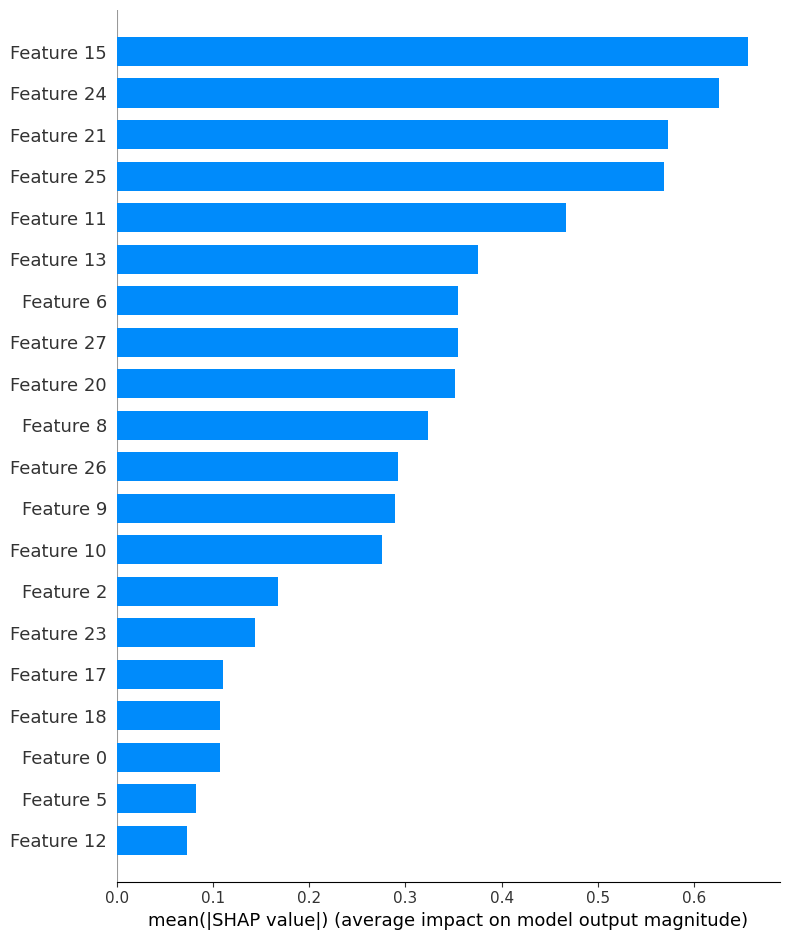

In [11]:
shap.summary_plot(
    shap_values,
    X,
    plot_type="bar"
)


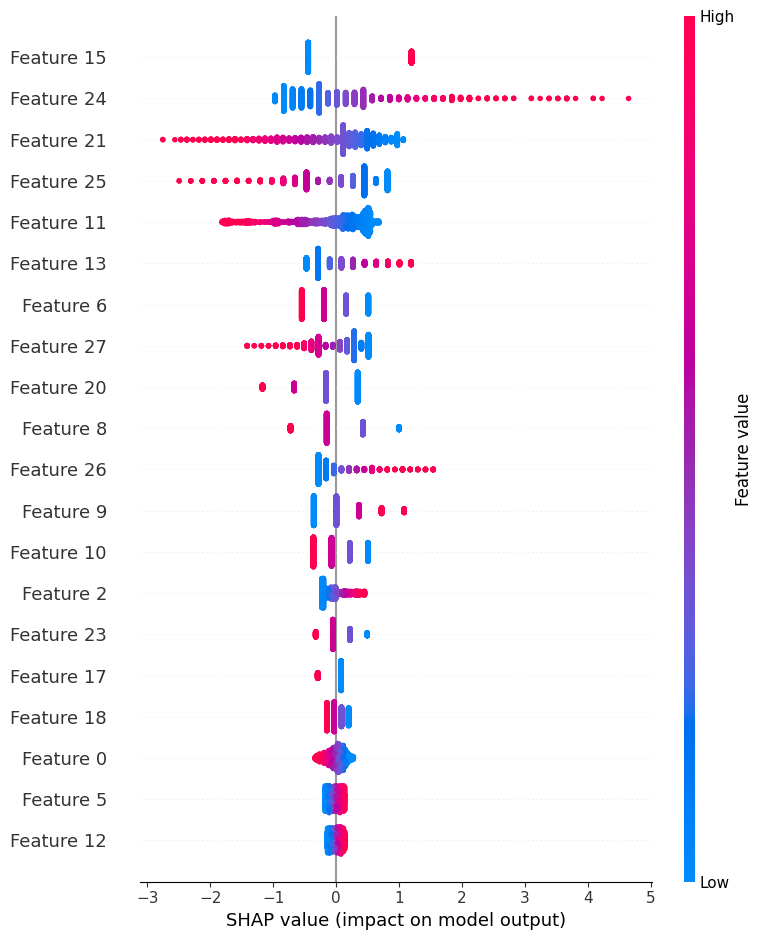

In [12]:
shap.summary_plot(
    shap_values,
    X
)


In [13]:
attrition_prob = log_model.predict_proba(X_scaled)[:, 1]

df_cleaned['attrition_risk_score'] = attrition_prob


In [14]:
df_cleaned['risk_bucket'] = pd.cut(
    attrition_prob,
    bins=[0, 0.3, 0.6, 1],
    labels=['Low', 'Medium', 'High']
)

df_cleaned[['attrition_risk_score', 'risk_bucket']].head()


,attrition_risk_score,risk_bucket
0,0.874863,High
1,0.101195,Low
2,0.803957,High
3,0.573371,Medium
4,0.636428,High


In [ ]:
high_risk_employees = (
    df_cleaned[df_cleaned['risk_bucket'] == 'High']
    .sort_values(by='attrition_risk_score', ascending=False)
)

high_risk_employees.head(10)


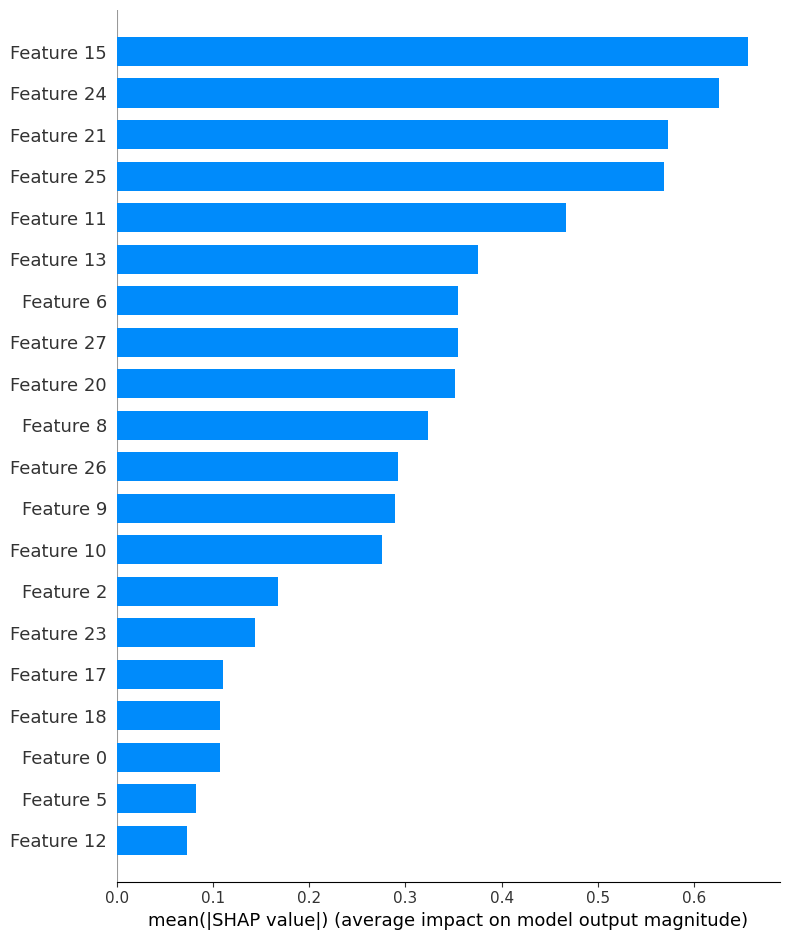

In [16]:
shap.summary_plot(
    shap_values,
    X,
    plot_type="bar",
    show=False
)

plt.tight_layout()
plt.savefig('../images/shap_summary.png', dpi=300)
plt.show()
